In [1]:
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import sys
curPath = os.path.abspath(os.path.dirname('__file__'))
rootPath = os.path.split(curPath)[0]
sys.path.append(os.path.split(rootPath)[0])
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # Mac下使用
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


from loans_drop.config.path import data_path
from loans_drop.config.recommend_push_feature import *
from loans_drop.data_cleaning.decode_field import cat_replace

print(curPath)
print(rootPath)
print(os.path.split(rootPath)[0])
sys.path

/Users/luocheng/Documents/dgg/bss-recommended-platform/loans_drop/jupyter
/Users/luocheng/Documents/dgg/bss-recommended-platform/loans_drop
/Users/luocheng/Documents/dgg/bss-recommended-platform


['/Users/luocheng/anaconda3/lib/python36.zip',
 '/Users/luocheng/anaconda3/lib/python3.6',
 '/Users/luocheng/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/Users/luocheng/anaconda3/lib/python3.6/site-packages',
 '/Users/luocheng/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/luocheng/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/luocheng/.ipython',
 '/Users/luocheng/Documents/dgg/bss-recommended-platform',
 '/Users/luocheng/Documents/dgg/bss-recommended-platform']

In [2]:
df = pd.read_csv(data_path + 'total_data20190711.csv',encoding = 'utf-8')
business_df = pd.read_csv(data_path + 'business_df.csv',encoding = 'utf-8')
employee_df = pd.read_csv(data_path + 'employee_df.csv',encoding = 'utf-8')
print(df.shape)
print(df.info())
df.head()

/Users/luocheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,10,12,13,14,15,16,19,21,22,23,24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(160316, 78)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160316 entries, 0 to 160315
Data columns (total 78 columns):
login_name                    160316 non-null int64
customer_id                   160316 non-null int64
product_amount                9729 non-null float64
followStart                   156022 non-null object
followEnd                     64854 non-null object
content                       156022 non-null object
salary_score                  156022 non-null float64
avgAddWechatFriendCount       158808 non-null float64
avgCallCount                  159549 non-null float64
avgIntentCustomerCount        126118 non-null float64
avgRemarkWords                159953 non-null float64
avgSignBillDays               79442 non-null float64
avgToDoorCount                149211 non-null float64
avgWorkHour                   159790 non-null float64
behaviorScore                 160181 non-null float64
loanRate                      150290 non-null float64
performanceRank        

,login_name,customer_id,product_amount,followStart,followEnd,content,salary_score,avgAddWechatFriendCount,avgCallCount,avgIntentCustomerCount,avgRemarkWords,avgSignBillDays,avgToDoorCount,avgWorkHour,behaviorScore,loanRate,performanceRank,signBillCount,signBillRate,toDoorRate,age,locked,post,rank,sex,work_age,average_performance_amount,average_profit_amount,average_internal_cost,average_external_cost,average_payment_amount,average_business_amount,average_cost_price,average_CALL_0940_1040,average_CALL_1100_1200,average_CALL_1400_1500,average_CALL_1520_1620,average_achievement,average_profit,average_internal_cost_orf,average_external_cost_orf,average_assist_achievement,average_assist_profit,orderAmount,meetingCount,orderCount,tccs,flagContent,flagRemark,mon,remarkType,times,addTypeCode,allotNumber,businessLocation,businessOperate,businessStage,businessStatus,extensionCode,followTimes,invalidNumber,isCost,isMind,lastLoseType,opportunitytypeCode,originCode,originType,placeCode,referral,uploadType,vip,wayCode,widelyType,coverCharge,refundOrderSign,signOderNum,callTimes,avgCallDuration
0,60432713,7807155386380238848,3000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,3000.0,1.0,1.0,NaN,0.0,0.960000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_1,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,33.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,dhtg,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,13.0,112.54
1,60432713,7814945782437298176,6000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,6000.0,1.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,15.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,3.0,106.00
2,60432713,7786526945294073856,1000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,1000.0,1.0,1.0,NaN,0.0,0.947368,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_7,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,CBJSFS_NO,0.0,NaN,BUS_OPP_5,BUS_LYQD_805,ORIGIN_TYPE_8,BUS_SOR_PLACE_BJ,1.0,2.0,0.0,BUS_WAY_CODE_1,0.0,500.0,0.0,NaN,10.0,124.90
3,60432713,7813284180585005056,12000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,12000.0,1.0,1.0,NaN,0.0,0.888889,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,BUS_LYQD_707,ORIGIN_TYPE_1,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,15.0,89.13
4,60432713,7816475258165575680,30000.0,2019-05-14 11:05:50,NaN,自动分配商机给【宋纯翎60432713】,0.0,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,30000.0,2.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_4,NaN,BUS_STA_2_3,NaN,8.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,4.0,76.25


In [3]:
def get_label(x):
    if x >= 0:
        return 1
    else:
        return 0
    
df['label']= df['product_amount'].apply(lambda x: get_label(x))
print(df.shape)
print(df.info())
print(df['label'].value_counts())
df.head()

(160316, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160316 entries, 0 to 160315
Data columns (total 79 columns):
login_name                    160316 non-null int64
customer_id                   160316 non-null int64
product_amount                9729 non-null float64
followStart                   156022 non-null object
followEnd                     64854 non-null object
content                       156022 non-null object
salary_score                  156022 non-null float64
avgAddWechatFriendCount       158808 non-null float64
avgCallCount                  159549 non-null float64
avgIntentCustomerCount        126118 non-null float64
avgRemarkWords                159953 non-null float64
avgSignBillDays               79442 non-null float64
avgToDoorCount                149211 non-null float64
avgWorkHour                   159790 non-null float64
behaviorScore                 160181 non-null float64
loanRate                      150290 non-null float64
performanceRank        

,login_name,customer_id,product_amount,followStart,followEnd,content,salary_score,avgAddWechatFriendCount,avgCallCount,avgIntentCustomerCount,avgRemarkWords,avgSignBillDays,avgToDoorCount,avgWorkHour,behaviorScore,loanRate,performanceRank,signBillCount,signBillRate,toDoorRate,age,locked,post,rank,sex,work_age,average_performance_amount,average_profit_amount,average_internal_cost,average_external_cost,average_payment_amount,average_business_amount,average_cost_price,average_CALL_0940_1040,average_CALL_1100_1200,average_CALL_1400_1500,average_CALL_1520_1620,average_achievement,average_profit,average_internal_cost_orf,average_external_cost_orf,average_assist_achievement,average_assist_profit,orderAmount,meetingCount,orderCount,tccs,flagContent,flagRemark,mon,remarkType,times,addTypeCode,allotNumber,businessLocation,businessOperate,businessStage,businessStatus,extensionCode,followTimes,invalidNumber,isCost,isMind,lastLoseType,opportunitytypeCode,originCode,originType,placeCode,referral,uploadType,vip,wayCode,widelyType,coverCharge,refundOrderSign,signOderNum,callTimes,avgCallDuration,label
0,60432713,7807155386380238848,3000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,3000.0,1.0,1.0,NaN,0.0,0.960000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_1,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,33.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,dhtg,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,13.0,112.54,1
1,60432713,7814945782437298176,6000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,6000.0,1.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,15.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,3.0,106.00,1
2,60432713,7786526945294073856,1000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,1000.0,1.0,1.0,NaN,0.0,0.947368,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_7,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,CBJSFS_NO,0.0,NaN,BUS_OPP_5,BUS_LYQD_805,ORIGIN_TYPE_8,BUS_SOR_PLACE_BJ,1.0,2.0,0.0,BUS_WAY_CODE_1,0.0,500.0,0.0,NaN,10.0,124.90,1
3,60432713,7813284180585005056,12000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,12000.0,1.0,1.0,NaN,0.0,0.888889,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,BUS_LYQD_707,ORIGIN_TYPE_1,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,15.0,89.13,1
4,60432713,7816475258165575680,30000.0,2019-05-14 11:05:50,NaN,自动分配商机给【宋纯翎60432713】,0.0,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,30000.0,2.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_4,NaN,BUS_STA_2_3,NaN,8.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,4.0,76.25,1


In [4]:
df = df[list(set(continues_columns+category_columns+['login_name','customer_id','label']))]
print(df.shape)
print(df.info())
print(df['label'].value_counts())
df = cat_replace(df)
df.head()

(160316, 73)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160316 entries, 0 to 160315
Data columns (total 73 columns):
callTimes                     146125 non-null float64
tccs                          18664 non-null float64
lastLoseType                  68226 non-null object
addTypeCode                   106506 non-null object
rank                          153984 non-null object
login_name                    160316 non-null int64
flagContent                   152784 non-null float64
signOderNum                   19354 non-null float64
uploadType                    106491 non-null float64
average_CALL_1100_1200        153978 non-null float64
age                           153984 non-null float64
customer_id                   160316 non-null int64
signBillRate                  160151 non-null float64
average_profit                153821 non-null float64
times                         7194 non-null float64
avgCallCount                  159549 non-null float64
avgIntentCustomerCount  


{'ORIGIN_TYPE_4': '2类', 'ORIGIN_TYPE_8': '转介绍', 'ORIGIN_TYPE_1': '3类', '其他': '其他', 'ORIGIN_TYPE_3': '5类', 'ORIGIN_TYPE_9': '平台和营运', 'ORIGIN_TYPE_6': '自开发', 'ORIGIN_TYPE_5': '4类', 'ORIGIN_TYPE_11': '网推3类', 'ORIGIN_TYPE_10': '网推2类', 'ORIGIN_TYPE_13': '网推5类', 'ORIGIN_TYPE_12': '网推4类', 'ORIGIN_TYPE_2': '1类', '公共字典': '公共字典', 'ORIGIN_TYPE_21': '顶峰', 'ORIGIN_TYPE_22': '小顶金融', 'ORIGIN_TYPE_7': '拾回', 'ORIGIN_TYPE_19': '知易声', '自开发': '自开发', '表单': '表单'}
2类       37640
3类       18079
自开发      16192
网推2类     13892
网推3类      6562
4类        3759
平台和营运     2587
5类        2279
其他        2106
转介绍       1287
网推4类       804
网推5类       682
顶峰         188
公共字典       149
1类         127
拾回         127
小顶金融        44
表单           1
知易声          1
Name: originType, dtype: int64

{'BUS_SOR_PLACE_BJ': '朝阳', 'BUS_SOR_PLACE_CD': '成都', 'BUS_SOR_PLACE_BJ_HD': '海淀', 'BUS_SOR_PLACE_WH': '武汉', 'BUS_SOR_PLACE_CQ': '重庆', 'BUS_SOR_PLACE_GZ': '广州', 'BUS_SOR_PLACE_SH': '上海', 'BUS_SOR_PLACE_HZ': '杭州', 'BUS_SOR_PLACE_FS': '佛山'

,callTimes,tccs,lastLoseType,addTypeCode,rank,login_name,flagContent,signOderNum,uploadType,average_CALL_1100_1200,age,customer_id,signBillRate,average_profit,times,avgCallCount,avgIntentCustomerCount,average_assist_achievement,remarkType,avgSignBillDays,isMind,performanceRank,average_profit_amount,businessStage,work_age,avgCallDuration,refundOrderSign,isCost,average_internal_cost,average_cost_price,businessOperate,locked,avgWorkHour,extensionCode,widelyType,flagRemark,signBillCount,label,businessLocation,wayCode,average_performance_amount,sex,followTimes,avgToDoorCount,opportunitytypeCode,average_business_amount,orderCount,businessStatus,avgAddWechatFriendCount,vip,average_achievement,invalidNumber,coverCharge,average_assist_profit,originCode,loanRate,toDoorRate,behaviorScore,average_CALL_1520_1620,average_internal_cost_orf,average_payment_amount,orderAmount,meetingCount,mon,referral,average_external_cost,average_CALL_1400_1500,allotNumber,avgRemarkWords,placeCode,average_external_cost_orf,originType,average_CALL_0940_1040
0,13.0,NaN,NaN,网运,P,60432713,0.0,NaN,2.0,4.237154,20.0,7807155386380238848,0.1165,401.371353,NaN,33.0,0.08,NaN,NaN,30.0,0.0,0.264045,2078.5625,NaN,15.0,112.54,0.0,计算成本,436.34375,38.791667,跟进,0.0,8.99,NaN,0.0,0.960000,26.0,1,个人库,抢单,2498.041667,1.0,33.0,1.12,公司商机,3172.291667,1.0,已签单,25.4,0.0,475.725464,0.0,NaN,NaN,电话推广,0.0364,0.66,100.0,4.482213,74.354111,2647.46875,3000.0,1.0,NaN,0.0,46.875,5.146245,1.0,64.57,朝阳,3.97878,2类,5.920949
1,3.0,NaN,NaN,新媒体,P,60432713,0.0,NaN,2.0,4.237154,20.0,7814945782437298176,0.1165,401.371353,NaN,33.0,0.08,NaN,NaN,30.0,0.0,0.264045,2078.5625,NaN,15.0,106.00,0.0,计算成本,436.34375,38.791667,跟进,0.0,8.99,NaN,0.0,0.750000,26.0,1,个人库,资源端分配,2498.041667,1.0,15.0,1.12,公司商机,3172.291667,1.0,已签单,25.4,0.0,475.725464,0.0,NaN,NaN,广点通,0.0364,0.66,100.0,4.482213,74.354111,2647.46875,6000.0,1.0,NaN,0.0,46.875,5.146245,1.0,64.57,朝阳,3.97878,2类,5.920949
2,10.0,NaN,NaN,转介绍,P,60432713,0.0,NaN,2.0,4.237154,20.0,7786526945294073856,0.1165,401.371353,NaN,33.0,0.08,NaN,NaN,30.0,0.0,0.264045,2078.5625,NaN,15.0,124.90,0.0,不计算,436.34375,38.791667,跟进,0.0,8.99,NaN,0.0,0.947368,26.0,1,个人库,资源端分配,2498.041667,1.0,21.0,1.12,转介绍,3172.291667,1.0,已签单,25.4,0.0,475.725464,0.0,500.0,NaN,转介绍,0.0364,0.66,100.0,4.482213,74.354111,2647.46875,1000.0,1.0,NaN,1.0,46.875,5.146245,1.0,64.57,朝阳,3.97878,转介绍,5.920949
3,15.0,NaN,NaN,新媒体,P,60432713,0.0,NaN,2.0,4.237154,20.0,7813284180585005056,0.1165,401.371353,NaN,33.0,0.08,NaN,NaN,30.0,0.0,0.264045,2078.5625,NaN,15.0,89.13,0.0,计算成本,436.34375,38.791667,跟进,0.0,8.99,NaN,0.0,0.888889,26.0,1,个人库,抢单,2498.041667,1.0,21.0,1.12,公司商机,3172.291667,1.0,已签单,25.4,0.0,475.725464,0.0,NaN,NaN,新媒体,0.0364,0.66,100.0,4.482213,74.354111,2647.46875,12000.0,1.0,NaN,0.0,46.875,5.146245,1.0,64.57,朝阳,3.97878,3类,5.920949
4,4.0,NaN,NaN,新媒体,P,60432713,0.0,NaN,2.0,4.237154,20.0,7816475258165575680,0.1165,401.371353,NaN,33.0,0.08,NaN,NaN,30.0,0.0,0.264045,2078.5625,NaN,15.0,76.25,0.0,计算成本,436.34375,38.791667,签单,0.0,8.99,NaN,0.0,0.750000,26.0,1,个人库,资源端分配,2498.041667,1.0,8.0,1.12,公司商机,3172.291667,1.0,已签单,25.4,0.0,475.725464,0.0,NaN,NaN,广点通,0.0364,0.66,100.0,4.482213,74.354111,2647.46875,30000.0,2.0,NaN,0.0,46.875,5.146245,1.0,64.57,朝阳,3.97878,2类,5.920949


# boxplot

In [17]:
for name1 in category_columns:
    if name1 in df.columns:
        for name2 in continues_columns:
            if name2 in df.columns:
                print(name1,name2)

locked avgAddWechatFriendCount
locked avgCallCount
locked avgIntentCustomerCount
locked avgRemarkWords
locked avgSignBillDays
locked avgToDoorCount
locked avgWorkHour
locked behaviorScore
locked loanRate
locked performanceRank
locked signBillCount
locked signBillRate
locked toDoorRate
locked age
locked work_age
locked average_performance_amount
locked average_profit_amount
locked average_internal_cost
locked average_external_cost
locked average_payment_amount
locked average_business_amount
locked average_cost_price
locked average_CALL_0940_1040
locked average_CALL_1100_1200
locked average_CALL_1400_1500
locked average_CALL_1520_1620
locked average_achievement
locked average_profit
locked average_internal_cost_orf
locked average_external_cost_orf
locked average_assist_achievement
locked average_assist_profit
locked orderAmount
locked meetingCount
locked orderCount
locked tccs
locked flagContent
locked flagRemark
locked mon
locked times
locked allotNumber
locked followTimes
locked invali

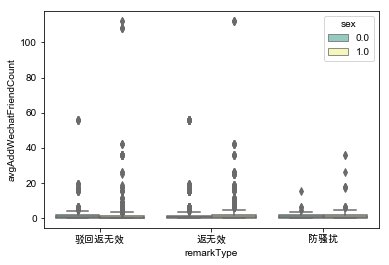

In [6]:
ax = sns.boxplot(x="remarkType", y="avgAddWechatFriendCount", hue="sex", data=df, palette="Set3")

KeyboardInterrupt: 

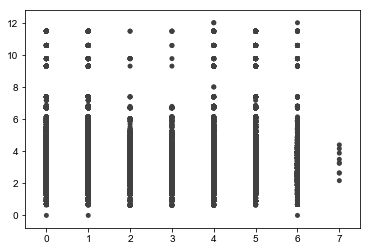

In [18]:
ax = sns.swarmplot(x="addTypeCode", y="average_CALL_1400_1500", data=df, color=".25")

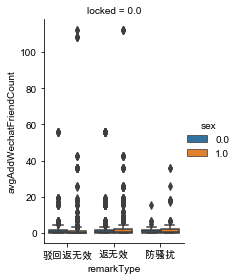

In [10]:
g = sns.catplot(x="remarkType", y="avgAddWechatFriendCount", hue="sex", col="locked", data=df, kind="box", height=4, aspect=.7)

# Violinplots

In [12]:
df.shape

(160316, 73)

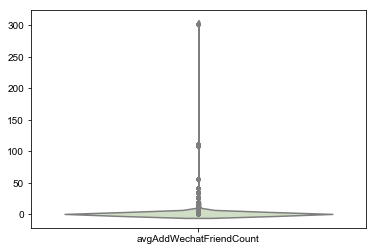

In [15]:
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=df[['avgAddWechatFriendCount', 'remarkType']], palette=pal, inner="points")

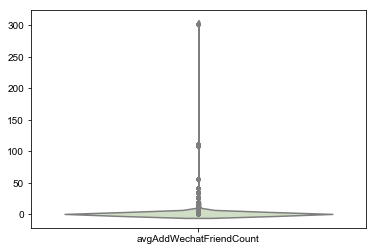

In [16]:
sns.violinplot(data=df[['remarkType', 'avgAddWechatFriendCount']], palette=pal, inner="points")

# distplot

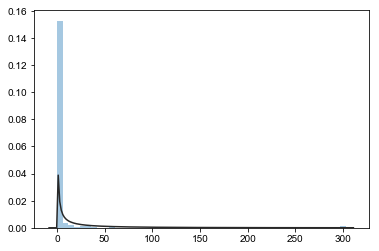

In [23]:
from scipy import stats
sns.distplot(df[['avgAddWechatFriendCount']].dropna().values, kde=False, fit=stats.gamma)

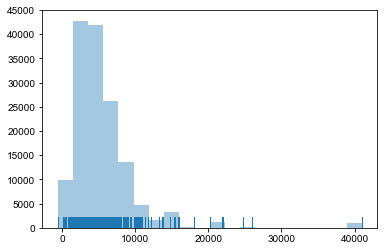

In [24]:
sns.distplot(df[['average_performance_amount']].dropna().values, bins=20, kde=False, rug=True);

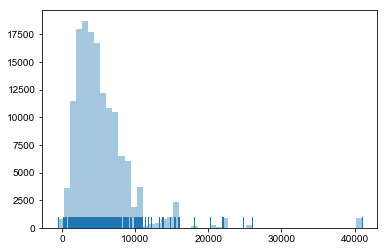

In [25]:
sns.distplot(df[['average_performance_amount']].dropna().values, kde=False, rug=True);

/Users/luocheng/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/luocheng/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


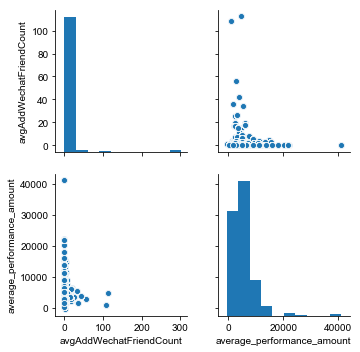

In [26]:
sns.pairplot(df[['lastLoseType', 'remarkType', 'avgAddWechatFriendCount', 'average_performance_amount']]);

# 三分类探索